# Auto Ownership 
Validation to Household Travel Survey

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

os.chdir('..\..\..\..')

from input_configuration import base_year

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [2]:
working_dir = r'outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

## Regional Totals and Distribution

Text(0, 0.5, 'Household Vehicles Owned')

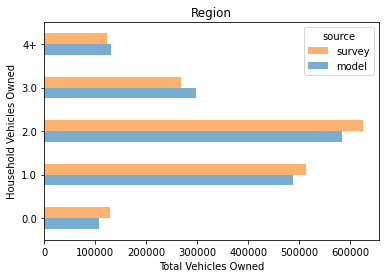

In [4]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'
df = df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')
ax = df.plot(kind='barh', title='Region', legend='reverse', alpha=0.6)
ax.set_xlabel('Total Vehicles Owned')
ax.set_ylabel('Household Vehicles Owned')

Distribution of Vehicles Owned at Regional Scale

Text(0, 0.5, 'Household Vehicles Owned')

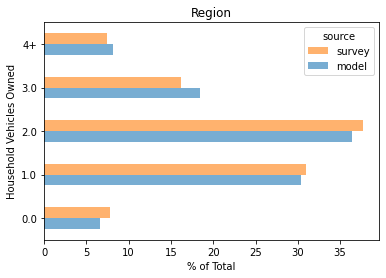

In [5]:
df['model'] = (df['model']/df['model'].sum()) * 100  
df['survey'] = (df['survey']/df['survey'].sum()) * 100  
df = df[['model', 'survey']]
ax = df.plot(kind='barh', title='Region', legend='reverse', alpha=0.6)
ax.set_xlabel("% of Total")
ax.set_ylabel('Household Vehicles Owned')

## Pierce County Totals and Distribution

Text(0, 0.5, 'Household Vehicles Owned')

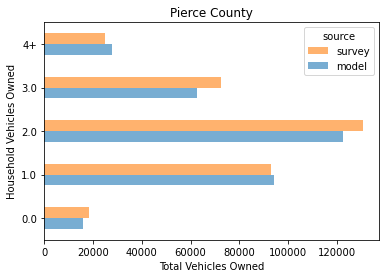

In [6]:
df = load_data('auto_ownership')
df = df[df['hh_county'] == 'Pierce']
df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'
df = df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')
ax = df.plot(kind='barh', title='Pierce County', legend='reverse', alpha=0.6)
ax.set_xlabel('Total Vehicles Owned')
ax.set_ylabel('Household Vehicles Owned')

Text(0, 0.5, 'Household Vehicles Owned')

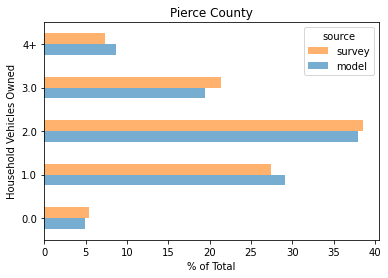

In [7]:
df['model'] = (df['model']/df['model'].sum()) * 100  
df['survey'] = (df['survey']/df['survey'].sum()) * 100  
df = df[['model', 'survey']]
ax = df.plot(kind='barh', title='Pierce County', legend='reverse', alpha=0.6)
ax.set_xlabel("% of Total")
ax.set_ylabel('Household Vehicles Owned')

## By Income

In [8]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df_total = pd.pivot_table(df, index=['source'], columns='income_bin', values='hhexpfac', aggfunc='sum')
df_total.columns = df_total.columns.add_categories(['Household Vehicles Owned', 'source'])
df_total['Household Vehicles Owned'] = 'Total'
df_total = df_total.reset_index().set_index(['Household Vehicles Owned', 'source'])
# df.rename(columns={'hhvehs': 'Household Vehicles Owned'}, inplace=True)
df_tab = pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')
df_tab.index.rename(['Household Vehicles Owned', 'source'], inplace=True)
pd.concat([df_tab,df_total])

income_bin                       0-$20k  $20-40k  $40-75k   >$75k
Household Vehicles Owned source                                  
0.0                      model   51,976   22,833   14,798  16,902
                         survey  64,043   27,901   17,279  20,465
1.0                      model  116,607  106,752  111,449 152,884
                         survey 138,715  102,527  110,953 160,079
2.0                      model   32,563   58,928  116,530 375,627
                         survey  90,579   85,436   77,247 371,635
3+                       model   11,574   23,491   63,819 328,405
                         survey  55,980   20,591   36,424 276,658
Total                    model  212,720  212,004  306,596 873,818
                         survey 349,316  236,456  241,903 828,838

#### By Income - Pierce county

In [9]:
df1 = df[df['hh_county'] == 'Pierce']

df_total = pd.pivot_table(df1, index=['source'], columns='income_bin', values='hhexpfac', aggfunc='sum')
df_total.columns = df_total.columns.add_categories(['Household Vehicles Owned', 'source'])
df_total['Household Vehicles Owned'] = 'Total'
df_total = df_total.reset_index().set_index(['Household Vehicles Owned', 'source'])
# df.rename(columns={'hhvehs': 'Household Vehicles Owned'}, inplace=True)
df_tab = pd.pivot_table(df1, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')
df_tab.index.rename(['Household Vehicles Owned', 'source'], inplace=True)
pd.concat([df_tab,df_total])

income_bin                       0-$20k  $20-40k  $40-75k   >$75k
Household Vehicles Owned source                                  
0.0                      model    8,787    3,935    2,215   1,145
                         survey  10,975    7,008      355      47
1.0                      model   28,172   25,624   22,261  18,316
                         survey  32,297   24,398   15,822  20,390
2.0                      model    9,258   16,308   30,702  66,319
                         survey  13,939   27,281   27,940  61,544
3+                       model    3,332    6,481   16,645  64,304
                         survey   9,098    8,115   10,476  69,556
Total                    model   49,549   52,348   71,823 150,084
                         survey  66,309   66,802   54,593 151,537

#### By Income - Other counties

In [10]:
df2 = df[df['hh_county'] != 'Pierce']

df_total = pd.pivot_table(df2, index=['source'], columns='income_bin', values='hhexpfac', aggfunc='sum')
df_total.columns = df_total.columns.add_categories(['Household Vehicles Owned', 'source'])
df_total['Household Vehicles Owned'] = 'Total'
df_total = df_total.reset_index().set_index(['Household Vehicles Owned', 'source'])
# df.rename(columns={'hhvehs': 'Household Vehicles Owned'}, inplace=True)
df_tab = pd.pivot_table(df2, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')
df_tab.index.rename(['Household Vehicles Owned', 'source'], inplace=True)
pd.concat([df_tab,df_total])

income_bin                       0-$20k  $20-40k  $40-75k   >$75k
Household Vehicles Owned source                                  
0.0                      model   43,189   18,898   12,583  15,757
                         survey  53,068   20,893   16,924  20,418
1.0                      model   88,435   81,128   89,188 134,568
                         survey 106,418   78,129   95,131 139,690
2.0                      model   23,305   42,620   85,828 309,308
                         survey  76,640   58,156   49,307 310,090
3+                       model    8,242   17,010   47,174 264,101
                         survey  46,882   12,476   25,949 207,103
Total                    model  163,171  159,656  234,773 723,734
                         survey 283,008  169,654  187,310 677,301

In [11]:
pd.options.display.float_format = "{:,.2%}".format
df = df.rename(columns={'hhvehs':'Household Vehicles Owned'})
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='Household Vehicles Owned', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()  * 100
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='Household Vehicles Owned', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()  * 100

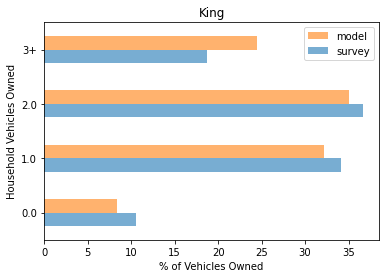

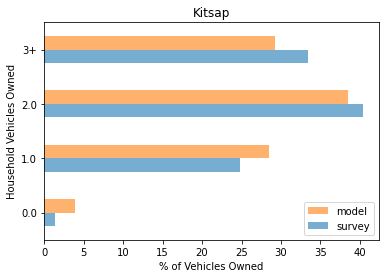

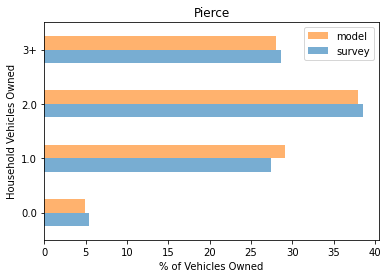

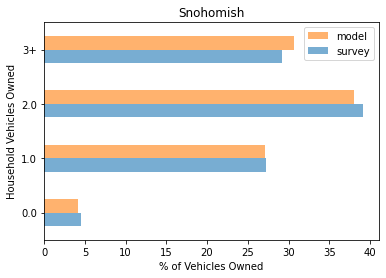

In [12]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    ax = _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)
    ax.set_xlabel('% of Vehicles Owned')